## Reading Data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numbers

Train_df = pd.read_csv('train.csv')
Demog = pd.read_csv('demog.csv')
Submission = pd.read_csv('submission.csv')

In [76]:
print("Train Data Shape ",Train_df.shape)
print("Demog Data Shape ",Demog.shape)
print("Submisison Data Shape", Submission.shape)

Tarin Data Shape  (37186, 12)
Demog Data Shape  (46485, 3)
Submisison Data Shape (37186, 9)


In [77]:
Train_df.head()

,HCP_ID,RL,P2P,OLV,RR,DRT,DMS,OLA,DEM,Region,Value,Speciality_ID
0,9304,0.645833,0.475755,NaN,NaN,0.0,0.169355,NaN,0.004458,urban,H,307999
1,9305,0.419355,0.190302,NaN,0.115167,0.0,0.012195,NaN,0.000000,urban,H,307999
2,9306,1.000000,NaN,NaN,0.134362,0.0,0.149254,0.129584,0.113179,urban,L,307999
3,9307,0.564102,NaN,0.054703,0.076778,NaN,0.138889,0.158047,0.002574,urban,H,307999
4,9308,0.584906,NaN,0.145874,0.383891,0.0,0.198198,0.125850,0.044009,urban,H,307999


In [78]:
Train_df.isnull().sum()

HCP_ID               0
RL                4849
P2P              29136
OLV              17027
RR                9648
DRT               4492
DMS               4379
OLA              11170
DEM              11040
Region               0
Value                0
Speciality_ID        0
dtype: int64

In [79]:
Demog.head()

,HCP_ID,gender,Age
0,14586,FEMALE,34
1,46157,MALE,34
2,16600,MALE,34
3,16601,MALE,33
4,16602,FEMALE,33


In [47]:
print("Train Data Columns\n", Train_df.columns)
print("\n\nSubmission Data Columns\n", Submission.columns)

Train Data Columns
 Index(['HCP_ID', 'RL', 'P2P', 'OLV', 'RR', 'DRT', 'DMS', 'OLA', 'DEM',
       'Region', 'Value', 'Speciality_ID'],
      dtype='object')


Submission Data Columns
 Index(['HCP_ID', 'RL', 'P2P', 'OLV', 'RR', 'DRT', 'DMS', 'OLA', 'DEM'], dtype='object')


## Percentage Of Null in Each Column

In [80]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    
    return round(num/den, 2)

Text(0,0.5,'Percentage of NUll Data')

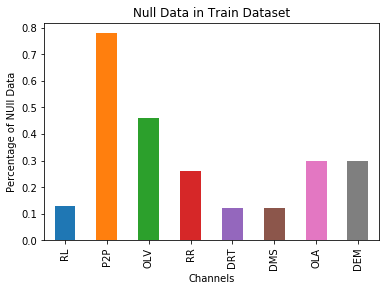

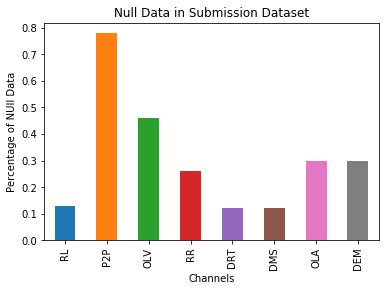

In [81]:
df_with_any_null_values = Train_df[Train_df.columns[Train_df.isnull().any()].tolist()]
s = get_percentage_missing(df_with_any_null_values)
plt.figure()
s.plot.bar()
plt.title('Null Data in Train Dataset')
plt.xlabel('Channels')
plt.ylabel('Percentage of NUll Data')



df_with_any_null_values = Submission[Submission.columns[Submission.isnull().any()].tolist()]
s = get_percentage_missing(df_with_any_null_values)
plt.figure()
s.plot.bar()
plt.title('Null Data in Submission Dataset')
plt.xlabel('Channels')
plt.ylabel('Percentage of NUll Data')



## Merge The given files and do the analysis

RL        0.13
P2P       0.78
OLV       0.46
RR        0.26
DRT       0.12
DMS       0.12
OLA       0.30
DEM       0.30
gender    0.00
dtype: float64
RL        0.13
P2P       0.78
OLV       0.46
RR        0.26
DRT       0.12
DMS       0.12
OLA       0.30
DEM       0.30
gender    0.00
dtype: float64


Text(0,0.5,'Percentage of NUll Data')

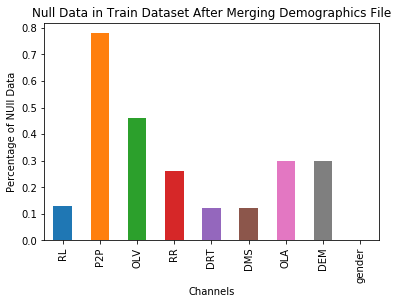

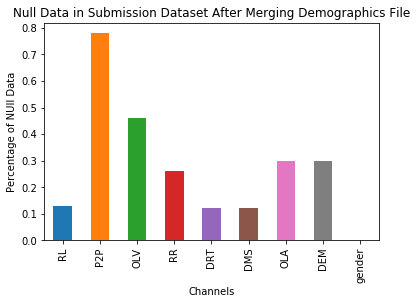

In [82]:
## Merging Demographic File to train and submission both files
Train = pd.merge(Train_df ,Demog,  on = ['HCP_ID'], how = 'left')
df_with_any_null_values = Train[Train.columns[Train.isnull().any()].tolist()]
s = get_percentage_missing(df_with_any_null_values)
print(s)
plt.figure()
s.plot.bar()
plt.title('Null Data in Train Dataset After Merging Demographics File')
plt.xlabel('Channels')
plt.ylabel('Percentage of NUll Data')

Submission_Merge = pd.merge(Submission ,Demog,  on = ['HCP_ID'], how = 'left')
df_with_any_null_values = Submission_Merge[Submission_Merge.columns[Submission_Merge.isnull().any()].tolist()]
s = get_percentage_missing(df_with_any_null_values)
print(s)
plt.figure()
s.plot.bar()
plt.title('Null Data in Submission Dataset After Merging Demographics File')
plt.xlabel('Channels')
plt.ylabel('Percentage of NUll Data')

In [83]:
Train.columns

Index(['HCP_ID', 'RL', 'P2P', 'OLV', 'RR', 'DRT', 'DMS', 'OLA', 'DEM',
       'Region', 'Value', 'Speciality_ID', 'gender', 'Age'],
      dtype='object')

## Using K Means Cluster and Fitting DMS Values

Filling DMS first because it have minimum ratio of NULL Data

I am using *K-Means-Clustering*. Hence what I am doing is assigning clusters to each column and then replacing the null columns by the mean/median of clusters.For **cross-validating** I am predicting the non-null values, by its cluster mean/median and then calculating the mean-squared error. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


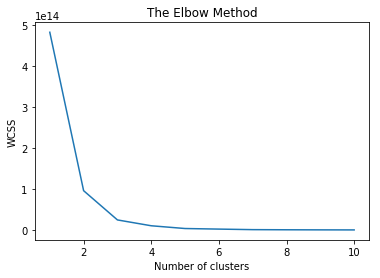

Cross Validating with median
0.1844100247121296
Cross Validating with mean
0.17432710011991617


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
# Lets's separate the data set having missing values
Train_DMS = Train[['Region','Value','Age','gender','DMS','Speciality_ID']]
Train_DMS['gender'].fillna('Male')

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_DMS[x]=lbl.fit_transform(Train_DMS[x].astype(str))
X = Train_DMS[['Region','Value','Age','gender','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)

Train_DMS['cluster'] = y_kmeans
Train_DMS_NOT_Null = Train_DMS[Train_DMS['DMS'].isnull() == False]

print("Cross Validating with median")
y = Train_DMS_NOT_Null.groupby("cluster")["DMS"].transform(lambda x: x.median())
from sklearn.metrics import mean_squared_error
from math import sqrt
meanSquaredError=sqrt(mean_squared_error(y,Train_DMS_NOT_Null['DMS']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_DMS_NOT_Null.groupby("cluster")["DMS"].transform(lambda x: x.mean())
from sklearn.metrics import mean_squared_error
from math import sqrt
meanSquaredError=sqrt(mean_squared_error(y,Train_DMS_NOT_Null['DMS']))
print(meanSquaredError)

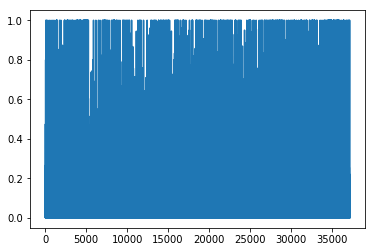

In [121]:
plt.plot(Train_DMS['DMS'])

In [85]:
# Updating Train Dataset
Train_DMS['DMS'] = Train_DMS.groupby("cluster")["DMS"].transform(lambda x: x.fillna(x.mean()))
Train_df['DMS'] = Train_DMS['DMS']
Train['DMS'] = Train_df['DMS']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Filling DRT Value

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


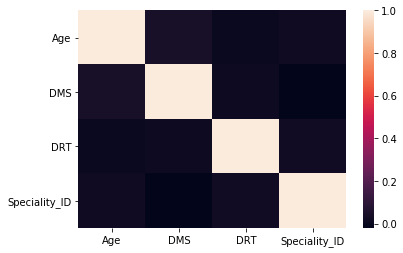

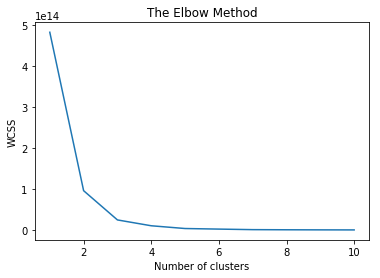

Cross Validating with median
0.10177125292739858
Cross Validating with mean
0.09487081707868121


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
# Lets's separate the data set having missing values
Train_DRT = Train[['Region','Value','Age','gender','DMS','DRT','Speciality_ID']]
Train_DRT['gender'].fillna('Male')
Train_DRT_Null = Train_DRT[Train_DRT['DRT'].isnull()]
Train_DRT_NOT_Null = Train_DRT[Train_DRT['DRT'].isnull() == False]


# Import Seaborn as sns
import seaborn as sns
corr = Train_DRT_NOT_Null.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# No correlation So let's carry out other methods 
# Mapping categorical variables. I don't think there is need of one hot encoding as the categorival data seems to be ordinal here.

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_DRT[x]=lbl.fit_transform(Train_DRT[x].astype(str))
X = Train_DRT[['Region','Value','Age','gender','DMS','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)

Train_DRT['cluster'] = y_kmeans
Train_DRT_NOT_Null = Train_DRT[Train_DRT['DRT'].isnull() == False]

print("Cross Validating with median")
y = Train_DRT_NOT_Null.groupby("cluster")["DRT"].transform(lambda x: x.median())
meanSquaredError=sqrt(mean_squared_error(y,Train_DRT_NOT_Null['DRT']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_DRT_NOT_Null.groupby("cluster")["DRT"].transform(lambda x: x.mean())
meanSquaredError=sqrt(mean_squared_error(y,Train_DRT_NOT_Null['DRT']))
print(meanSquaredError)

In [87]:
Train_DRT['DRT'] = Train_DRT.groupby("cluster")["DRT"].transform(lambda x: x.fillna(x.mean()))
Train_df['DRT'] = Train_DRT['DRT']
Train['DRT'] = Train_df['DRT']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


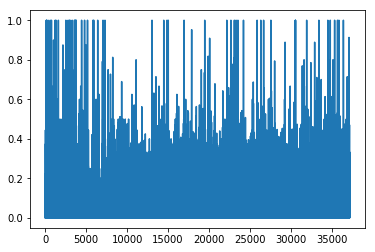

In [123]:
plt.plot(Train_DRT['DRT'])

## Filling RL Values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


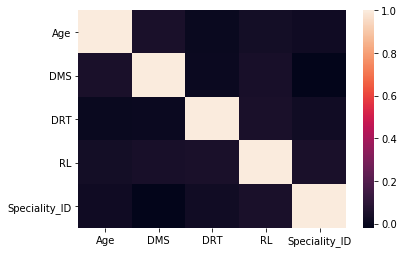

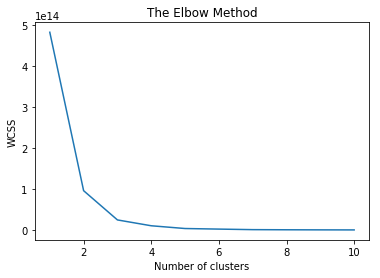

Cross Validating with median
0.18525500387304467
Cross Validating with mean
0.18308963992898802


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [88]:
# Lets's separate the data set having missing values
Train_RL = Train[['Region','Value','Age','gender','DMS','DRT','RL','Speciality_ID']]
Train_RL['gender'].fillna('Male')
Train_RL_Null = Train_RL[Train_RL['RL'].isnull()]
Train_RL_NOT_Null = Train_RL[Train_RL['RL'].isnull() == False]


# Import Seaborn as sns
import seaborn as sns
corr = Train_RL.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# No correlation So let's carry out other methods 
# Mapping categorical variables. I don't think there is need of one hot encoding as the categorival data seems to be ordinal here.

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_RL[x]=lbl.fit_transform(Train_RL[x].astype(str))
X = Train_RL[['Region','Value','Age','gender','DMS','DRT','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)
Train_RL['cluster'] = y_kmeans
Train_RL_NOT_Null = Train_RL[Train_RL['RL'].isnull() == False]

print("Cross Validating with median")
y = Train_RL_NOT_Null.groupby("cluster")["RL"].transform(lambda x: x.median())
meanSquaredError=sqrt(mean_squared_error(y,Train_RL_NOT_Null['RL']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_RL_NOT_Null.groupby("cluster")["RL"].transform(lambda x: x.mean())
meanSquaredError=sqrt(mean_squared_error(y,Train_RL_NOT_Null['RL']))
print(meanSquaredError)


In [89]:
Train_RL['RL'] = Train_RL.groupby("cluster")["RL"].transform(lambda x: x.fillna(x.mean()))
Train_df['RL'] = Train_RL['RL']
Train['RL'] = Train_df['RL']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


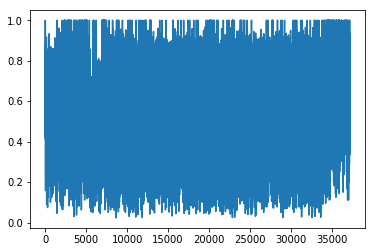

In [124]:
plt.plot(Train_RL['RL'])

## Filling RR Values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


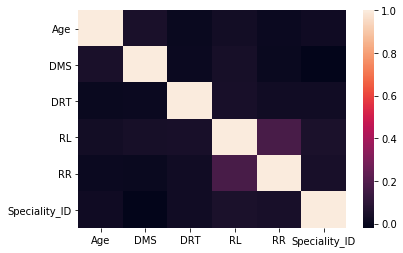

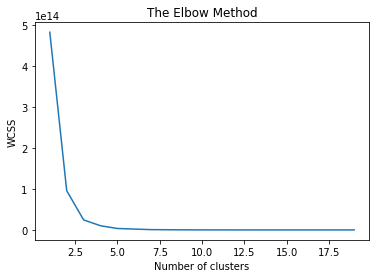

Cross Validating with median
0.20405826595154655
Cross Validating with mean
0.19652308178920935


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
# Lets's separate the data set having missing values
Train_RR = Train[['Region','Value','Age','gender','DMS','DRT','RL','RR','Speciality_ID']]
Train_RR['gender'].fillna('Male')
Train_RR_Null = Train_RR[Train_RR['RR'].isnull()]
Train_RR_NOT_Null = Train_RR[Train_RR['RR'].isnull() == False]


# Import Seaborn as sns
import seaborn as sns
corr = Train_RR.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# No correlation So let's carry out other methods 
# Mapping categorical variables. I don't think there is need of one hot encoding as the categorival data seems to be ordinal here.

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_RR[x]=lbl.fit_transform(Train_RR[x].astype(str))
X = Train_RR[['Region','Value','Age','gender','DMS','DRT','RL','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()    
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)

Train_RR['cluster'] = y_kmeans
Train_RR_NOT_Null = Train_RR[Train_RR['RR'].isnull() == False]

print("Cross Validating with median")
y = Train_RR_NOT_Null.groupby("cluster")["RR"].transform(lambda x: x.median())
meanSquaredError=sqrt(mean_squared_error(y,Train_RR_NOT_Null['RR']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_RR_NOT_Null.groupby("cluster")["RR"].transform(lambda x: x.mean())
meanSquaredError=sqrt(mean_squared_error(y,Train_RR_NOT_Null['RR']))
print(meanSquaredError)

# Train_RR['cluster'] = y_kmeans
# Train_RR['RR'] = Train_RR.groupby("cluster")["RR"].transform(lambda x: x.fillna(x.median()))


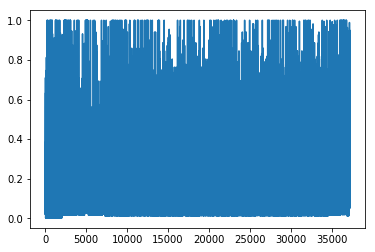

In [125]:
plt.plot(Train_RR['RR'])

In [91]:
Train_RR['RR'] = Train_RR.groupby("cluster")['RR'].transform(lambda x: x.fillna(x.mean()))
Train_df['RR'] = Train_RR['RR']
Train['RR'] = Train_df['RR']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Filling DEM Values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


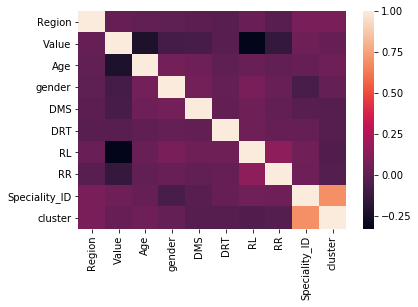

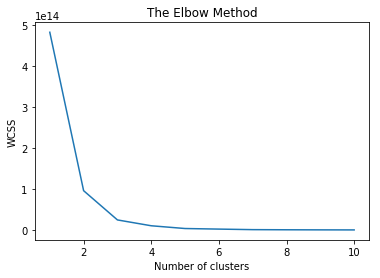

Cross Validating with median
0.09211718133688705
Cross Validating with mean
0.08859892603106137


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
# Lets's separate the data set having missing values
Train_DEM = Train[['Region','Value','Age','gender','DMS','DRT','RL','RR','DEM','Speciality_ID']]
Train_DEM['gender'].fillna('Male')
Train_DEM_Null = Train_DEM[Train_DEM['DEM'].isnull()]
Train_DEM_NOT_Null = Train_DEM[Train_DEM['DEM'].isnull() == False]


# Import Seaborn as sns
import seaborn as sns
corr = Train_RR.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# No correlation So let's carry out other methods 
# Mapping categorical variables. I don't think there is need of one hot encoding as the categorival data seems to be ordinal here.

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_DEM[x]=lbl.fit_transform(Train_DEM[x].astype(str))
X = Train_DEM[['Region','Value','Age','gender','DMS','DRT','RL','RR','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)

Train_DEM['cluster'] = y_kmeans
Train_DEM_NOT_Null = Train_DEM[Train_DEM['DEM'].isnull() == False]

print("Cross Validating with median")
y = Train_DEM_NOT_Null.groupby("cluster")["DEM"].transform(lambda x: x.median())
meanSquaredError=sqrt(mean_squared_error(y,Train_DEM_NOT_Null['DEM']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_DEM_NOT_Null.groupby("cluster")["DEM"].transform(lambda x: x.mean())
meanSquaredError=sqrt(mean_squared_error(y,Train_DEM_NOT_Null['DEM']))
print(meanSquaredError)

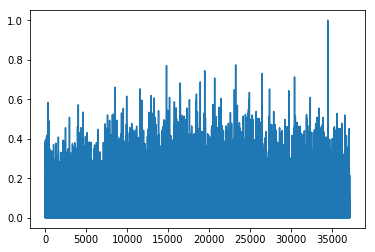

In [126]:
plt.plot(Train_DEM['DEM'])

In [94]:
Train_DEM['DEM'] = Train_DEM.groupby("cluster")['DEM'].transform(lambda x: x.fillna(x.mean()))
Train_df['DEM'] = Train_DEM['DEM']
Train['DEM'] = Train_df['DEM']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Filling OLA Values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


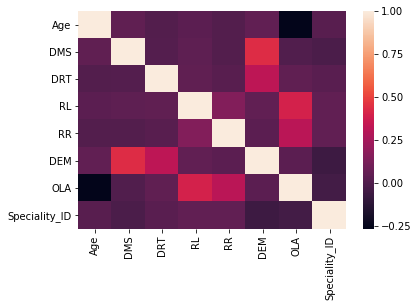

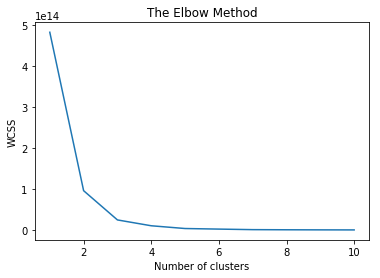

Cross Validating with median
0.11333090031939873
Cross Validating with mean
0.11305918107705622


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [95]:
# Lets's separate the data set having missing values
Train_OLA = Train[['Region','Value','Age','gender','DMS','DRT','RL','RR','DEM','OLA','Speciality_ID']]
Train_OLA['gender'].fillna('Male')
Train_OLA_Null = Train_OLA[Train_OLA['OLA'].isnull()]
Train_OLA_NOT_Null = Train_OLA[Train_OLA['OLA'].isnull() == False]


# Import Seaborn as sns
import seaborn as sns
corr = Train_OLA.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# Few columns have correlation 
# Mapping categorical variables. I don't think there is need of one hot encoding as the categorival data seems to be ordinal here.

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_OLA[x]=lbl.fit_transform(Train_DEM[x].astype(str))
X = Train_OLA[['Region','Value','Age','gender','DMS','DRT','RL','RR','DEM','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# #Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)

Train_OLA['cluster'] = y_kmeans
Train_OLA_NOT_Null = Train_OLA[Train_OLA['OLA'].isnull() == False]

print("Cross Validating with median")
y = Train_OLA_NOT_Null.groupby("cluster")["OLA"].transform(lambda x: x.median())
meanSquaredError=sqrt(mean_squared_error(y,Train_OLA_NOT_Null['OLA']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_OLA_NOT_Null.groupby("cluster")["OLA"].transform(lambda x: x.mean())
meanSquaredError=sqrt(mean_squared_error(y,Train_OLA_NOT_Null['OLA']))
print(meanSquaredError)

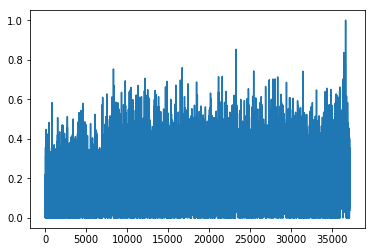

In [127]:
plt.plot(Train_OLA['OLA'])

In [97]:
Train_OLA['OLA'] = Train_OLA.groupby("cluster")['OLA'].transform(lambda x: x.fillna(x.mean()))
Train_df['OLA'] = Train_OLA['OLA']
Train['OLA'] = Train_df['OLA']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Filling OLV Values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


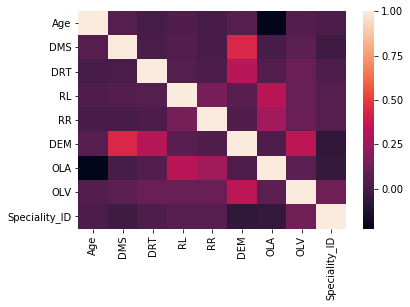

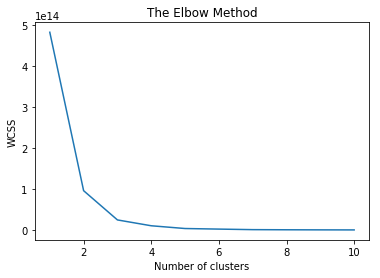

Cross Validating with median
0.13895722385509213
Cross Validating with mean
0.190051885229197


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [98]:
# Lets's separate the data set having missing values
Train_OLV = Train[['Region','Value','Age','gender','DMS','DRT','RL','RR','DEM','OLA','OLV','Speciality_ID']]
Train_OLV['gender'].fillna('Male')
Train_OLV_Null = Train_OLV[Train_OLV['OLV'].isnull()]
Train_OLV_NOT_Null = Train_OLV[Train_OLV['OLV'].isnull() == False]


# Import Seaborn as sns
import seaborn as sns
corr = Train_OLV.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# No correlation So let's carry out other methods 
# Mapping categorical variables. I don't think there is need of one hot encoding as the categorival data seems to be ordinal here.

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_OLV[x]=lbl.fit_transform(Train_OLV[x].astype(str))
X = Train_OLV[['Region','Value','Age','gender','DMS','DRT','RL','RR','DEM','OLA','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# #Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)

Train_OLV['cluster'] = y_kmeans
Train_OLV_NOT_Null = Train_OLV[Train_OLV['OLV'].isnull() == False]

print("Cross Validating with median")
y = Train_OLV_NOT_Null.groupby("cluster")["OLV"].transform(lambda x: x.median())
meanSquaredError=sqrt(mean_squared_error(y,Train_OLV_NOT_Null['OLA']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_OLV_NOT_Null.groupby("cluster")["OLV"].transform(lambda x: x.mean())
meanSquaredError=sqrt(mean_squared_error(y,Train_OLV_NOT_Null['OLV']))
print(meanSquaredError)

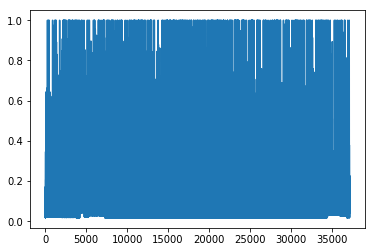

In [128]:
plt.plot(Train_OLV['OLV'])

In [99]:
Train_OLV['OLV'] = Train_OLV.groupby("cluster")['OLV'].transform(lambda x: x.fillna(x.mean()))
Train_df['OLV'] = Train_OLV['OLV']
Train['OLV'] = Train_df['OLV']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Filling P2P VAlues

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


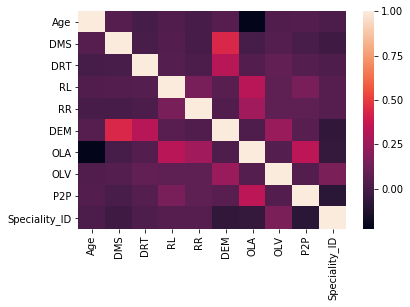

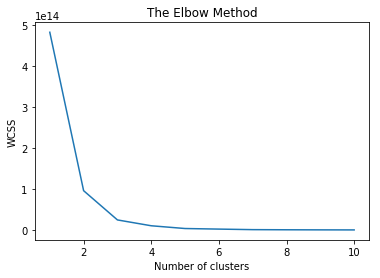

Cross Validating with median
0.18803895064032597
Cross Validating with mean
0.17829573067329427


In [100]:
# Lets's separate the data set having missing values
Train_P2P = Train[['Region','Value','Age','gender','DMS','DRT','RL','RR','DEM','OLA','OLV','P2P','Speciality_ID']]
Train_P2P['gender'].fillna('Male')
Train_P2P_Null = Train_P2P[Train_P2P['P2P'].isnull()]
Train_P2P_NOT_Null = Train_P2P[Train_P2P['P2P'].isnull() == False]


# Import Seaborn as sns
import seaborn as sns
corr = Train_P2P.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
# No correlation So let's carry out other methods 
# Mapping categorical variables. I don't think there is need of one hot encoding as the categorival data seems to be ordinal here.

cols = ['Region','Value','gender']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    Train_P2P[x]=lbl.fit_transform(Train_P2P[x].astype(str))
X = Train_P2P[['Region','Value','Age','gender','DMS','DRT','RL','RR','DEM','OLA','OLV','Speciality_ID']]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure()    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X.values)

Train_P2P['cluster'] = y_kmeans
Train_P2P_NOT_Null = Train_P2P[Train_P2P['P2P'].isnull() == False]

print("Cross Validating with median")
y = Train_P2P_NOT_Null.groupby("cluster")["P2P"].transform(lambda x: x.median())
meanSquaredError=sqrt(mean_squared_error(y,Train_P2P_NOT_Null['P2P']))
print(meanSquaredError)

print("Cross Validating with mean")
y = Train_P2P_NOT_Null.groupby("cluster")["P2P"].transform(lambda x: x.mean())
meanSquaredError=sqrt(mean_squared_error(y,Train_P2P_NOT_Null['P2P']))
print(meanSquaredError)

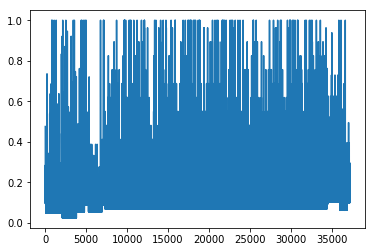

In [129]:
plt.plot(Train_P2P['P2P'])

In [101]:
Train_P2P['P2P'] = Train_P2P.groupby("cluster")['P2P'].transform(lambda x: x.fillna(x.mean()))
Train_df['P2P'] = Train_P2P['P2P']
Train['P2P'] = Train_df['P2P']

 The error which I am calculating below is not the cross validation error what I am doing is ** I used K-Means clustering ** and    assigned clusters to each row/sample then to fill the null values I take mean/median and to cross check the error ** I again calculated the values of columns which have no null values using mean/median and then calculated the error  from its original value.**

In [130]:
#Calculating RMSE
RMSE = [0.183, 0.178, 0.138, 0.196, 0.094, 0.174, 0.103, 0.0866]
Values = [4849, 29136, 17027, 9648, 4492, 4379, 11170, 111040]
MUl = [RMSE*Values for RMSE,Values in zip(RMSE,Values)]
rmse = sqrt( sum(MUl) / sum(Values))
print(rmse)

0.3407647055352389


## Submission File

In [131]:
sub_temp = Submission


In [132]:
sub_temp['RL'] = Train_df['RL']
sub_temp['RR'] = Train_df['RR']
sub_temp['DEM'] = Train_df['DEM']
sub_temp['P2P'] = Train_df['P2P']
sub_temp['DRT'] = Train_df['DRT']
sub_temp['DMS'] = Train_df['DMS']
sub_temp['OLV'] = Train_df['OLV']
sub_temp['OLA'] = Train_df['OLA']

In [134]:
sub_temp.to_csv('Abhinav_Jain_14031997.csv' , index = False)

## Another Appraoch

Another Appraoch I used the KNN Imputation Method but it needs headvy computation and while running my system got hanged that's why I was not able to use that.